In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("final_dataset.csv")

In [5]:
df.head()

,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect,CommonStockParOrStatedValuePerShare,CommonStockValue,IncomeTaxExpenseBenefit,Liabilities,LiabilitiesAndStockholdersEquity,LiabilitiesCurrent,...,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,StockholdersEquity,name,cityba,afs,major_group
0,9.907030e+08,3.321320e+08,3.646900e+07,-1.329986e+07,0.330000,8.535000e+06,3.672000e+06,6.223228e+08,9.907030e+08,1.882050e+08,...,6.883000e+06,1.081700e+07,1.604200e+07,2.922960e+08,3.521300e+08,4.975510e+08,"apogee enterprises, inc.",minneapolis,2,32
1,5.081851e+06,3.097867e+06,1.233738e+06,-3.607717e+07,0.000100,3.918470e+05,5.877600e+04,7.778580e+05,5.081851e+06,1.007339e+07,...,-2.297400e+04,-9.091680e+05,3.988800e+04,1.110440e+05,-1.586272e+08,-5.769400e+06,"growlife, inc.",kirkland,4,32
2,9.764530e+08,3.438940e+08,6.182100e+07,1.291976e+07,0.330000,8.465000e+06,1.753000e+06,5.943901e+08,9.764530e+08,1.996490e+08,...,5.490700e+07,-2.116000e+06,1.297300e+07,2.729940e+08,3.363980e+08,4.765610e+08,"apogee enterprises, inc.",minneapolis,2,32
3,5.594300e+10,1.856100e+10,7.759000e+09,1.360000e+08,0.100000,1.200000e+08,6.500000e+07,1.368400e+10,5.594300e+10,5.462000e+09,...,8.584000e+09,3.141000e+09,3.328000e+09,2.477269e+10,3.645200e+10,4.225900e+10,micron technology inc,boise,1,36
4,3.497606e+08,1.687910e+05,7.572800e+04,-6.435467e+07,-3.213715,3.200882e+07,-6.560332e+06,7.166041e+07,3.497606e+08,5.958541e+07,...,-6.953740e+05,3.850752e+07,-1.067923e+06,1.527225e+07,-7.149248e+07,-7.149162e+07,"indie semiconductor, inc.",aliso viejo,4,36


In [6]:
df_num = df.select_dtypes(['number'])
df_num.head()

,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect,CommonStockParOrStatedValuePerShare,CommonStockValue,IncomeTaxExpenseBenefit,Liabilities,LiabilitiesAndStockholdersEquity,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,StockholdersEquity,afs,major_group
0,9.907030e+08,3.321320e+08,3.646900e+07,-1.329986e+07,0.330000,8.535000e+06,3.672000e+06,6.223228e+08,9.907030e+08,1.882050e+08,-14257000.0,-4.148000e+06,6.883000e+06,1.081700e+07,1.604200e+07,2.922960e+08,3.521300e+08,4.975510e+08,2,32
1,5.081851e+06,3.097867e+06,1.233738e+06,-3.607717e+07,0.000100,3.918470e+05,5.877600e+04,7.778580e+05,5.081851e+06,1.007339e+07,873568.0,-3.937026e+07,-2.297400e+04,-9.091680e+05,3.988800e+04,1.110440e+05,-1.586272e+08,-5.769400e+06,4,32
2,9.764530e+08,3.438940e+08,6.182100e+07,1.291976e+07,0.330000,8.465000e+06,1.753000e+06,5.943901e+08,9.764530e+08,1.996490e+08,-32217000.0,-8.763000e+06,5.490700e+07,-2.116000e+06,1.297300e+07,2.729940e+08,3.363980e+08,4.765610e+08,2,32
3,5.594300e+10,1.856100e+10,7.759000e+09,1.360000e+08,0.100000,1.200000e+08,6.500000e+07,1.368400e+10,5.594300e+10,5.462000e+09,-437000000.0,-8.055000e+09,8.584000e+09,3.141000e+09,3.328000e+09,2.477269e+10,3.645200e+10,4.225900e+10,1,36
4,3.497606e+08,1.687910e+05,7.572800e+04,-6.435467e+07,-3.213715,3.200882e+07,-6.560332e+06,7.166041e+07,3.497606e+08,5.958541e+07,637407.0,-6.453273e+07,-6.953740e+05,3.850752e+07,-1.067923e+06,1.527225e+07,-7.149248e+07,-7.149162e+07,4,36


In [7]:
X = np.array(df_num)

In [8]:
X

array([[ 9.90703000e+08,  3.32132000e+08,  3.64690000e+07, ...,
         4.97551000e+08,  2.00000000e+00,  3.20000000e+01],
       [ 5.08185100e+06,  3.09786700e+06,  1.23373800e+06, ...,
        -5.76940000e+06,  4.00000000e+00,  3.20000000e+01],
       [ 9.76453000e+08,  3.43894000e+08,  6.18210000e+07, ...,
         4.76561000e+08,  2.00000000e+00,  3.20000000e+01],
       ...,
       [ 4.60310000e+07,  3.26390000e+07,  2.57000000e+06, ...,
         1.26800000e+07,  4.00000000e+00,  5.70000000e+01],
       [ 1.49922000e+08,  7.97600000e+07,  7.12121929e+07, ...,
         5.69570000e+07,  4.00000000e+00,  2.50000000e+01],
       [ 6.65408800e+09,  2.80352300e+09,  4.45852000e+08, ...,
         2.92184300e+09,  1.00000000e+00,  3.70000000e+01]])

In [9]:
fib = [1, 1]
i = 2
while i < 100:
    fib.append(fib[-2] + fib[-1])
    i += 1
fib

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155,
 165580141,
 267914296,
 433494437,
 701408733,
 1134903170,
 1836311903,
 2971215073,
 4807526976,
 7778742049,
 12586269025,
 20365011074,
 32951280099,
 53316291173,
 86267571272,
 139583862445,
 225851433717,
 365435296162,
 591286729879,
 956722026041,
 1548008755920,
 2504730781961,
 4052739537881,
 6557470319842,
 10610209857723,
 17167680177565,
 27777890035288,
 44945570212853,
 72723460248141,
 117669030460994,
 190392490709135,
 308061521170129,
 498454011879264,
 806515533049393,
 1304969544928657,
 2111485077978050,
 3416454622906707,
 5527939700884757,
 8944394323791464,
 14472334024676221,
 23416728348467685,
 37889062373143906,
 61305790721611591,
 99194853094755497,
 160500643

In [11]:
elbow_results = []
def do_kmeans(k):
    kmeans = KMeans(n_clusters=k).fit(X)
    print('finished k=', k)
    elbow_results.append(kmeans)

In [12]:
do_kmeans(1)

finished k= 1


In [13]:
elbow_results

[KMeans(n_clusters=1)]

In [15]:
[e.inertia_ for e in elbow_results]

[3.038006424818439e+26]

In [16]:
do_kmeans(3)

finished k= 3


In [17]:
do_kmeans(5)

finished k= 5


In [19]:
fib[5:11]

[8, 13, 21, 34, 55, 89]

In [20]:
elbow_results

[KMeans(n_clusters=1), KMeans(n_clusters=3), KMeans(n_clusters=5)]

In [22]:
for k in fib[5:11]:
    do_kmeans(k)

finished k= 8
finished k= 13
finished k= 21
finished k= 34
finished k= 55
finished k= 89


In [27]:
elbow_results[0].cluster_centers_

array([[ 1.40867257e+10,  3.79727678e+09,  7.50102982e+08,
         7.12319315e+07,  2.11291227e+01,  1.01168637e+08,
         3.53336877e+07,  1.32425125e+10,  1.41644521e+10,
         3.80332118e+09,  1.09557979e+08, -2.90355989e+08,
         2.55851246e+08,  1.45483832e+08,  1.62989768e+08,
         1.53315473e+09,  1.67102516e+09,  2.22897373e+09,
         2.84191829e+00,  4.88318532e+01]])

In [47]:
def plot(elbow_results):
    x = [len(km.cluster_centers_) for km in elbow_results]
    print(min(x), max(x), x)
    y = [km.inertia_ for km in elbow_results]
    plt.scatter(x, y)
    plt.title('Error in Clusters vs. K (Elbow Method)')

1 144 [1, 3, 5, 8, 13, 21, 34, 55, 89, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


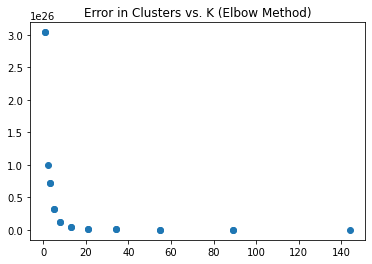

In [48]:
plot(elbow_results)

In [36]:
for k in fib[1:12]:
    do_kmeans(k)

finished k= 1
finished k= 2
finished k= 3
finished k= 5
finished k= 8
finished k= 13
finished k= 21
finished k= 34
finished k= 55
finished k= 89
finished k= 144


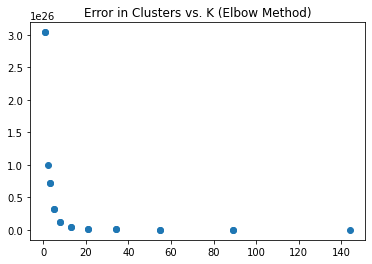

In [37]:
plot(elbow_results)

In [38]:
len(elbow_results)

20

In [39]:
fib[11]

144

In [42]:
km_5 = elbow_results[2]
len(km_5.cluster_centers_)

5

In [43]:
km_5.inertia_

3.282900197600889e+25

In [49]:
km_8 = elbow_results[3]
len(km_8.cluster_centers_)

8

In [50]:
km_8.inertia_

1.199712341693864e+25

In [52]:
kmeans = km_8
clusters_inds = [[] for i in range(8)]
for i in range(len(kmeans.labels_)):
  cluster_number = kmeans.labels_[i]
  clusters_inds[cluster_number - 1].append(i)

In [57]:
small_cluster_inds = [c for c in clusters_inds if len(c) < 50]
small_cluster_inds

[[2907, 3858, 3864, 3884, 4671],
 [5042],
 [2371, 2374, 3728, 3856, 3857, 4822],
 [2908, 3872],
 [4832],
 [2196,
  2379,
  2513,
  3187,
  3716,
  3865,
  3879,
  3909,
  3911,
  4337,
  4819,
  4825,
  4831,
  4836,
  4839,
  4852]]

In [58]:
outlier_companies = [[df['name'][i] for i in c] for c in small_cluster_inds]
outlier_companies

[['federal home loan mortgage corp',
  'wells fargo & company/mn',
  'bank of america corp /de/',
  'citigroup inc',
  'hsbc holdings plc'],
 ['gap inc'],
 ['morgan stanley',
  'goldman sachs group inc',
  'berkshire hathaway inc',
  'ubs group ag',
  'ubs ag',
  'prudential financial inc'],
 ['federal national mortgage association fannie mae', 'jpmorgan chase & co'],
 ['brighthouse life insurance co'],
 ['royal dutch shell plc',
  'schwab charles corp',
  'at&t inc.',
  'bank of new york mellon corp',
  'american international group, inc.',
  'capital one financial corp',
  'us bancorp de',
  'truist financial corp',
  'pnc financial services group, inc.',
  'hologic inc',
  'lincoln national corp',
  'metlife inc',
  'lincoln national life insurance co /in/',
  'metropolitan life insurance co',
  'prudential plc',
  'jackson financial inc.']]

In [59]:
f = open('outlier_companies_8.txt', 'w')
f.write(str(outlier_companies))
f.close()

In [60]:
f = open('outlier_companies_inds_8.txt', 'w')
f.write(str(small_cluster_inds))
f.close()

In [62]:
df.head()

,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect,CommonStockParOrStatedValuePerShare,CommonStockValue,IncomeTaxExpenseBenefit,Liabilities,LiabilitiesAndStockholdersEquity,LiabilitiesCurrent,...,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,StockholdersEquity,name,cityba,afs,major_group
0,9.907030e+08,3.321320e+08,3.646900e+07,-1.329986e+07,0.330000,8.535000e+06,3.672000e+06,6.223228e+08,9.907030e+08,1.882050e+08,...,6.883000e+06,1.081700e+07,1.604200e+07,2.922960e+08,3.521300e+08,4.975510e+08,"apogee enterprises, inc.",minneapolis,2,32
1,5.081851e+06,3.097867e+06,1.233738e+06,-3.607717e+07,0.000100,3.918470e+05,5.877600e+04,7.778580e+05,5.081851e+06,1.007339e+07,...,-2.297400e+04,-9.091680e+05,3.988800e+04,1.110440e+05,-1.586272e+08,-5.769400e+06,"growlife, inc.",kirkland,4,32
2,9.764530e+08,3.438940e+08,6.182100e+07,1.291976e+07,0.330000,8.465000e+06,1.753000e+06,5.943901e+08,9.764530e+08,1.996490e+08,...,5.490700e+07,-2.116000e+06,1.297300e+07,2.729940e+08,3.363980e+08,4.765610e+08,"apogee enterprises, inc.",minneapolis,2,32
3,5.594300e+10,1.856100e+10,7.759000e+09,1.360000e+08,0.100000,1.200000e+08,6.500000e+07,1.368400e+10,5.594300e+10,5.462000e+09,...,8.584000e+09,3.141000e+09,3.328000e+09,2.477269e+10,3.645200e+10,4.225900e+10,micron technology inc,boise,1,36
4,3.497606e+08,1.687910e+05,7.572800e+04,-6.435467e+07,-3.213715,3.200882e+07,-6.560332e+06,7.166041e+07,3.497606e+08,5.958541e+07,...,-6.953740e+05,3.850752e+07,-1.067923e+06,1.527225e+07,-7.149248e+07,-7.149162e+07,"indie semiconductor, inc.",aliso viejo,4,36


In [63]:
df['cluster label'] = km_8.labels_

In [67]:
df.to_csv('final_dataset_clustered.csv')

In [82]:
def plot_clusters(df, km):
    x = df['AssetsCurrent']
    y = df['major_group']
    colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green', 'brown', 'grey']
    color = [colors[i] for i in km.labels_]
    plt.scatter(x, y, color=color)
    plt.xlabel('Assets')
    plt.ylabel('SIC')
    plt.title('Clusters')

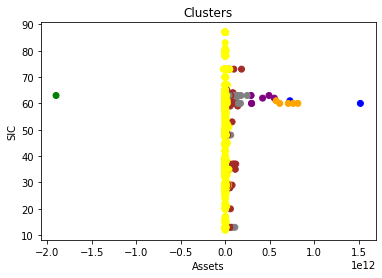

In [83]:
plot_clusters(df, km_8)

In [84]:
from sklearn.decomposition import PCA

In [169]:
def plot_clusters_pca(df, km):
    pca = PCA(2)
    X_transformed = pca.fit_transform(X)
    x = X_transformed[:, 0]
    y = X_transformed[:, 1]
    colors = ['blue', 'yellow', 'orange', 'red', 'purple', 'green', 'brown', 'grey']
    color = [colors[i] for i in km.labels_]
    plt.scatter(x, y, color=color)
    plt.title('Clusters')

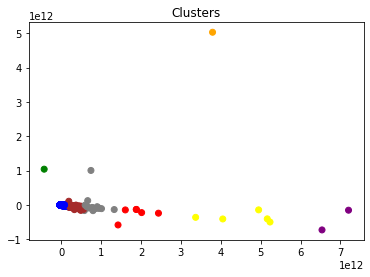

In [170]:
plot_clusters_pca(df, km_8)

(array([ 243.,   67., 1103.,  920.,  335.,  135.,  899.,  402.,  747.,
         216.]),
 array([12. , 19.5, 27. , 34.5, 42. , 49.5, 57. , 64.5, 72. , 79.5, 87. ]),
 <BarContainer object of 10 artists>)

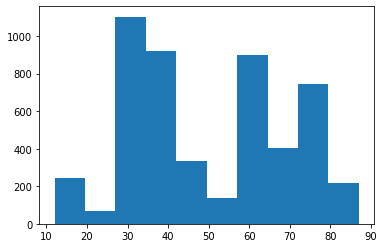

In [91]:
plt.hist(df['major_group'])

In [112]:
major_group_enum = list(set(df['major_group']))

In [113]:
sic_codes_df = pd.read_csv('sic-codes.csv')

In [114]:
sic_major_groups = np.array(sic_codes_df['Major Group'])
sic_desc = np.array(sic_codes_df['Description'])

In [119]:
def major_group_to_desc(major_group):
    inds = np.where(sic_major_groups == major_group)[0]
    ind = inds[0] # for now
    return sic_desc[ind]

In [ ]:
counts = [0] * len(major_group_enum)
for el in df['major_group']:
    counts[major_group_enum.index(el)] += 1
plt.bar(major_group_enum, counts)
ticks = [major_group_to_desc(a) for a in major_group_enum]
plt.xticks(np.arange(len(ticks)), ticks)
plt.title('Histogram of SIC codes')

In [124]:
def dennis_df():
    # Load data
    df = pd.read_csv("final_dataset.csv")

    # Load 2 digit sic and sic
    df_sic = pd.read_csv("major-groups.csv", usecols=['Major Group', 'Description'])

    # Rename columns
    df_sic.columns = ['major_group', 'description']

    # Extract 2-digit SIC code
    df = df.merge(df_sic, on='major_group')

    return df

In [ ]:
df_denis = dennis_df()
# plt.hist(df['description'])
df_denis.head()

In [ ]:
plt.hist(df_denis['description'])

In [ ]:
plt.hist(df_denis['description'])
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-small')

In [105]:
major_group_to_desc(11)

array([], dtype=object)

In [106]:
sic_major_groups

array([ 1,  1,  1, ..., 97, 97, 99])

In [107]:
sic_desc

array(['Wheat', 'Rice', 'Corn', ..., 'National Security',
       'International Affairs', 'Nonclassifiable Establishments'],
      dtype=object)

In [110]:
np.where(sic_major_groups == 13)

(array([71, 72, 73, 74, 75]),)

In [111]:
sic_desc[71]

'Crude Petroleum and Natural Gas'

In [154]:
df_sic = pd.read_csv("major-groups.csv")
major_group_enum = list(set(df_sic['Major Group']))

In [155]:
sic_major_groups = np.array(df_sic['Major Group'])
sic_desc = np.array(df_sic['Description'])

In [156]:
def major_group_to_desc(major_group):
    inds = np.where(sic_major_groups == major_group)[0]
    ind = inds[0] # for now
    return sic_desc[ind]

In [ ]:
counts = [0] * len(major_group_enum)
for el in df['major_group']:
    counts[major_group_enum.index(el)] += 1
plt.bar(major_group_enum, counts)
ticks = [major_group_to_desc(a)[:20] for a in major_group_enum]
plt.xticks(np.arange(len(ticks)), ticks)
plt.title('Histogram of SIC codes')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-small')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

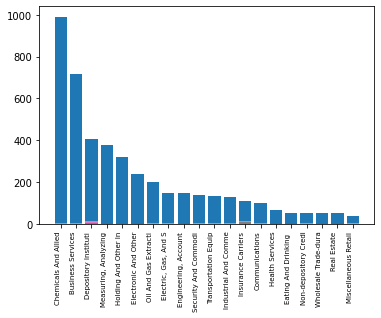

In [162]:
######
# Load data
my_df = pd.read_csv("final_dataset_clustered.csv")

# Load 2 digit sic and sic
df_sic = pd.read_csv("major-groups.csv")

# Extract 2-digit SIC code
my_df = my_df.merge(df_sic, on='Major Group')

# my_df.sort_values('cluster label', inplace=True)

my_df = my_df.groupby(['Major Group', 'cluster label'])['Major Group'].count().unstack('cluster label').fillna(0)
# my_df.plot(kind='bar', stacked=True)

my_df.sort_values(0, inplace=True, ascending=False)
my_df = my_df.head(20)

labels = [major_group_to_desc(a)[:20] for a in my_df.index]
fig, ax = plt.subplots()
for i in range(8):
    ax.bar(labels, my_df[i], label=i)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-small')

In [145]:
my_df.head()

cluster label,0,1,2,3,4,5,6,7
Major Group,,,,,,,,
12,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,200.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
15,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
